In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
df['sex']= df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] =  df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
import matplotlib.pyplot as plt
for col in df.columns:
    plt.figure()
    plt.hist(df[col])
    plt.title(col, color = "White")
    plt.xticks(color = "White")
    plt.yticks(color = "White")

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['charges'], axis =1)
y = df.charges
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
dt_clf = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(418.5, 679.5, 'smoker <= 0.5\nmse = 146468393.299\nsamples = 936\nvalue = 13379.157'),
 Text(209.25, 407.69999999999993, 'age <= 42.5\nmse = 37221997.558\nsamples = 741\nvalue = 8542.875'),
 Text(104.625, 135.89999999999998, 'mse = 21618064.588\nsamples = 413\nvalue = 5409.331'),
 Text(313.875, 135.89999999999998, 'mse = 28938262.494\nsamples = 328\nvalue = 12488.466'),
 Text(627.75, 407.69999999999993, 'bmi <= 29.972\nmse = 134977942.179\nsamples = 195\nvalue = 31757.029'),
 Text(523.125, 135.89999999999998, 'mse = 24643421.678\nsamples = 95\nvalue = 21261.647'),
 Text(732.375, 135.89999999999998, 'mse = 35737222.979\nsamples = 100\nvalue = 41727.642')]

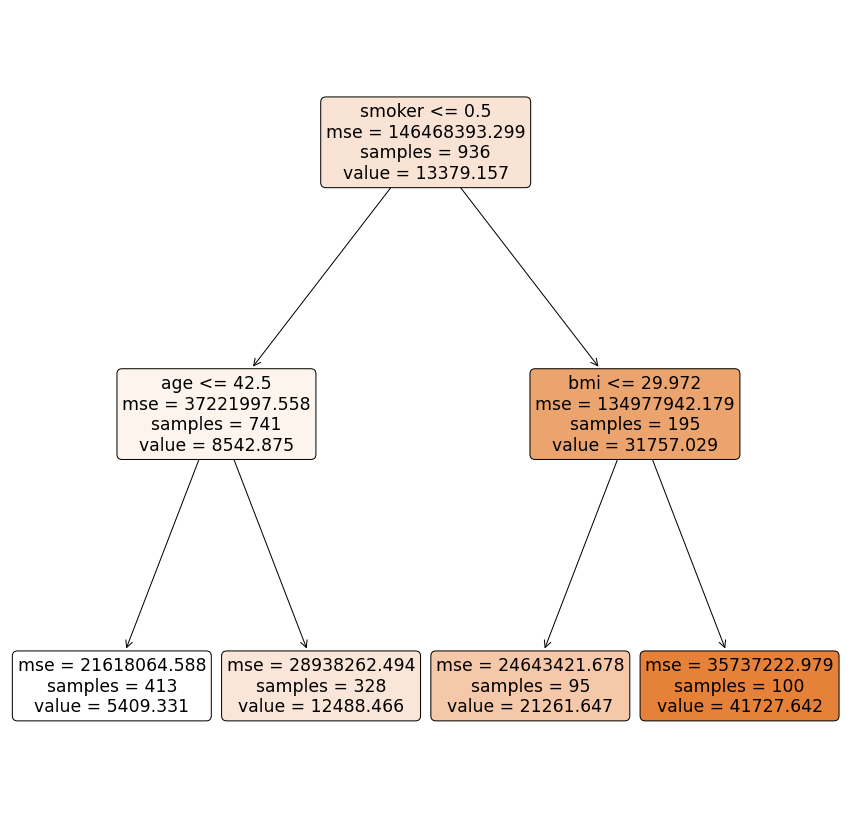

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dt_clf, 
        filled=True, 
        rounded=True,
        feature_names=X.columns)

In [25]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(dt_clf,X_test,y_test)
# plt.xticks(color="White")
# plt.yticks(color="White")